# ML Exercise Demo

This notebook contains the first exercise of the Machine Learning for Visual Computing (183.605) lecture at TU Wien. Assignment via TUWEL. Please be aware of the deadlines in TUWEL.

* Upload a zip-file with the required programms. The programming language is python. **Please update your group number in the filename (_X)** and only upload your solutions folder.
    1. Single Layer Perceptron --> `solutions_G_X/perceptron.py`
    2. Support Vector Machine --> `solutions_G_X/svm.py`
    3. Multi Layer Perceptron --> `solutions_G_X/mlp.py`
* If you needed additional conda or pip packages add an anaconda environment.yml to the zip-file
    1. conda env export > environment.yml
    2. See --> https://conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html#sharing-an-environment

##### Conda instructions

1. conda create --name MLVC
4. conda activate MLVC
5. conda install pytorch torchvision torchaudio pytorch-cuda=11.8 -c pytorch -c nvidia
6. python -m pip install pillow matplotlib tqdm torchinfo pandas ipykernel nbformat ipywidgets scikit-learn tabulate cvxopt seaborn

### Settings

In [7]:
%load_ext autoreload
%autoreload 2

# General setting for the ipynb
NUM_SAMPLES = 10000     # Number of training samples that will be generated
TEST_RATIO = 0.9        # Percentage of the generated samples that are used for training (rest is used for testing). [0, 1]
EPOCHS_Perceptron = 1000# Amount of training epochs for the single layer perceptron
EPOCHS_MLP = 10         # Amount of training epochs for the multi layer perceptron

LR_SLP = 0.1            # Learning rate of the SLP
LR_MLP = 0.01           # Learning rate of the MLPs

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Generate and Prepare Data

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from tqdm import trange

np.set_printoptions(suppress=True)

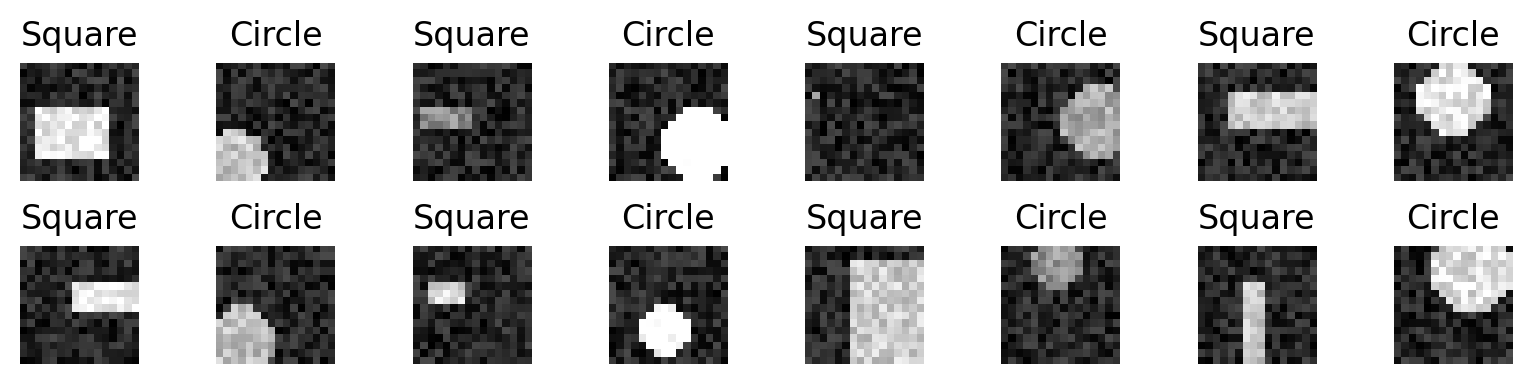

(9000, 256) (9000,) (1000, 256) (1000,)


In [9]:
# Generate the dataset using numpy and pillow

from utils import Dataset
(dataset_train, labels_train), (dataset_test, labels_test) = Dataset(NUM_SAMPLES, TEST_RATIO)

fig, axs = plt.subplots(2, 8, figsize=(8, 2), dpi=200)

for i, ax in enumerate(axs.reshape(-1)):
    ax.imshow(dataset_train[i,:].reshape((16, 16)), cmap="gray", vmin=0, vmax=255)
    ax.set_title("Circle" if labels_train[i] == -1 else "Square")
    ax.axis('off')

plt.tight_layout()
plt.show()
print(dataset_train.shape, labels_train.shape, dataset_test.shape, labels_test.shape)

## 1. Perceptron (10 Points)

The following code works only, if corresponding definitions in the 'solutions' folder are complete. Look at the 'ToDo' comments in the corresponding files.

In [6]:
from solution_G_X import Perceptron
from utils import plot_results_perceptron

100%|██████████| 1000/1000 [00:03<00:00, 283.01it/s]


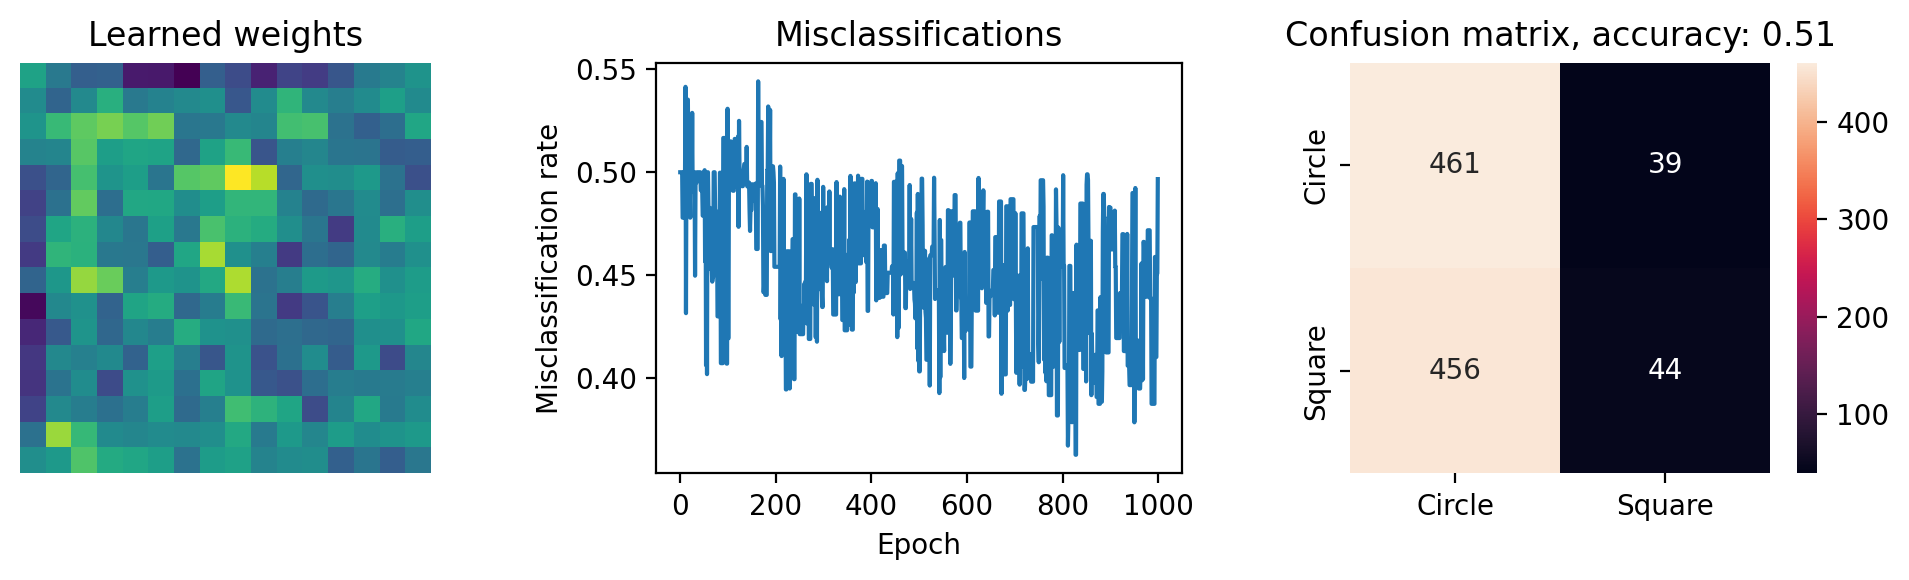

In [7]:
perceptron = Perceptron(lr=LR_SLP, epochs=EPOCHS_Perceptron)

miss_list = perceptron.fit(dataset_train, labels_train)

# convert the miss_list to a miss_rate
miss_list = np.array(miss_list)
miss_list = miss_list / dataset_train.shape[0]

y_pred = perceptron.predict(dataset_test)

plot_results_perceptron(perceptron.w, miss_list, labels_test, y_pred)

#### Perceptron Expected Results (Trained: 10.000 Samples, 1000 Epochs, 0.1 LR)
Left: Example weights of the Perceptron.

Middle: Example graph of the missclassifications during training, per epoch.

Right: Confusion matrix of the trained Perceptron.

**Note**: As the Perceptron is not capable of separating the data, we do not expect a high accuracy.

<div style="display:flex; justify-content:center; background-color:white;">
  <div style="text-align:center; padding:10px;">
    <img src="imgs/weights_and_missclassifications_SLP.png" style="height:100%; width:auto;">
  </div>
</div>

## 2. Support Vector Machine (20 Points)

The following code works only if corresponding definitions in the 'solutions' folder are complete. Look at the 'ToDo' comments in the corresponding files.

#### Reduce Training Data for SVM for performance reasons

In [4]:
# only take 500 examples for SVM for performance reasons
dataset_train_svm = dataset_train[:500]
labels_train_svm = labels_train[:500]

#### Example SVM Scikit-Learn

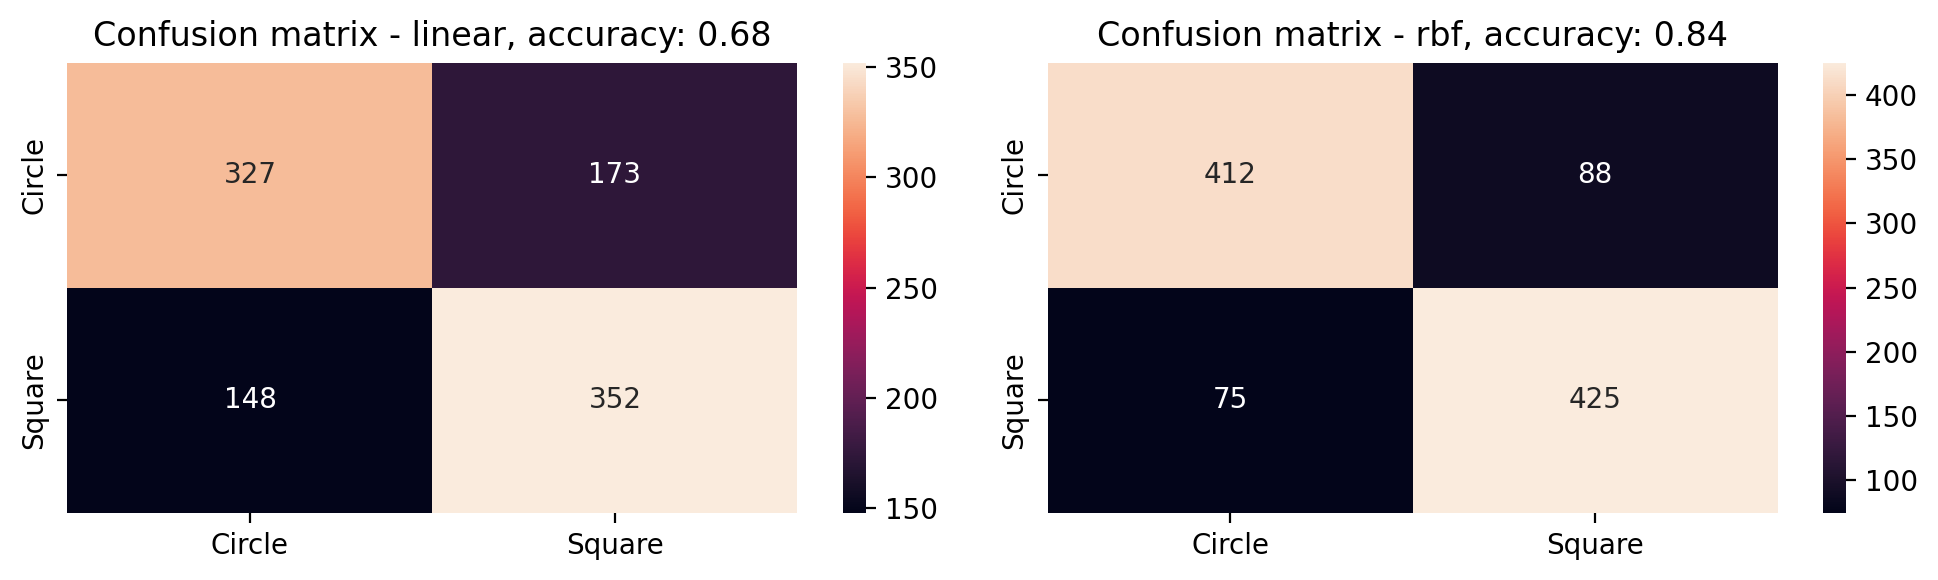

In [27]:
from sklearn.svm import SVC
from utils import plot_results_svm

classifier_rbf = SVC(kernel = 'rbf')
classifier_rbf.fit(dataset_train_svm, labels_train_svm)

y_pred_rbf = classifier_rbf.predict(dataset_test)

classifier_linear = SVC(kernel = 'linear')
classifier_linear.fit(dataset_train_svm, labels_train_svm)

y_pred_linear = classifier_linear.predict(dataset_test)

plot_results_svm(labels_test, y_pred_rbf, y_pred_linear)

#### Your SVM Implementation

In [10]:
from solution_G_X import SVM

Computing kernel matrix...
Done.
Computing kernel matrix...
Done.


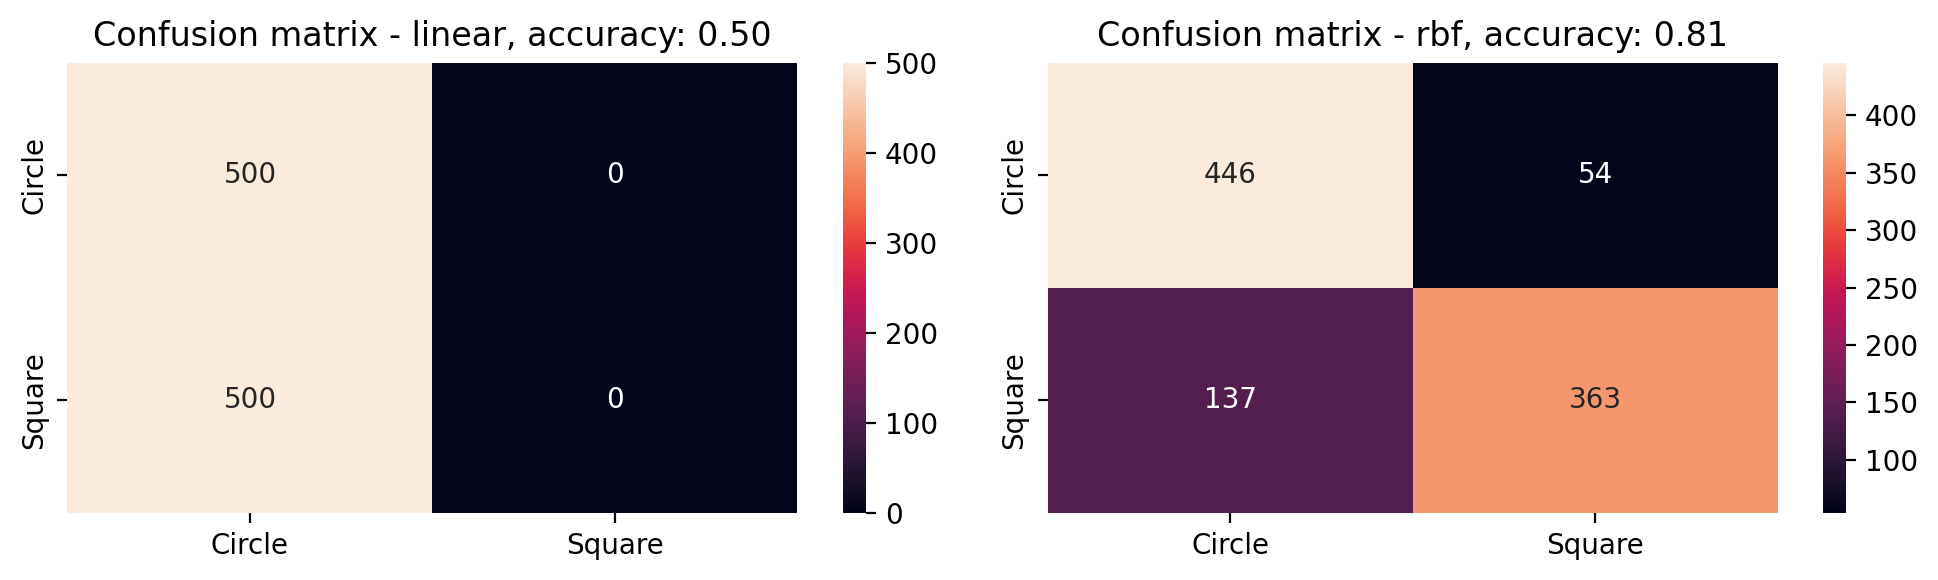

In [64]:
classifier_linear = SVM(kernel="linear")
classifier_linear.fit(dataset_train_svm, labels_train_svm)
y_pred_linear = classifier_linear.predict(dataset_test)

classifier_rbf = SVM(kernel="rbf", sigma=0.25)
classifier_rbf.fit(dataset_train_svm, labels_train_svm)
y_pred_rbf = classifier_rbf.predict(dataset_test)

plot_results_svm(labels_test, y_pred_rbf, y_pred_linear)

#### SVM Expected Results (Trained: 500 Samples)
Left: Confustion matrix of the trained linear SVM.

Right: Confusion matrix of the trained RBF SVM.

<div style="display:flex; justify-content:center; background-color:white;">
  <div style="text-align:center; padding:10px;">
    <img src="imgs/cm_SVM.png" style="height:100%; width:auto;">
  </div>
</div>

## 3. Multi Layer Perceptron (20 Points)

#### Convert Dataset to PyTorch

This sub-section contains an experiment using the pytorch MLP as a reference. The next sub-section calls your own functions.

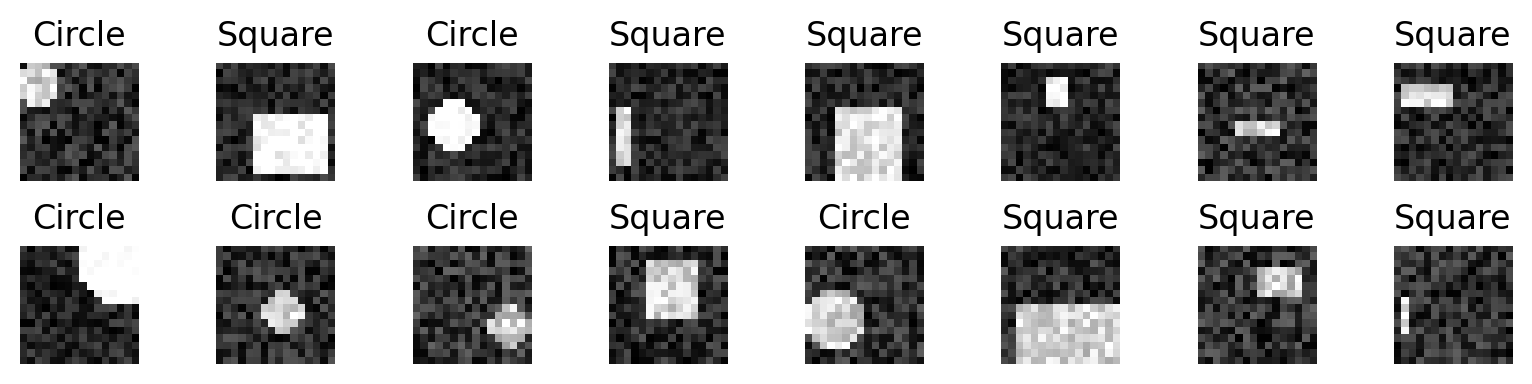

In [10]:
from utils import Dataset_PyTorch

dataloader_train, dataloader_test = Dataset_PyTorch(dataset_train, labels_train, dataset_test, labels_test, batch_size=1)
fig, axs = plt.subplots(2, 8, figsize=(8, 2), dpi=200)
axs = axs.reshape(-1)
for i, (x, y) in enumerate(dataloader_train):
    axs[i].imshow(x.reshape((16, 16)), cmap="gray")
    axs[i].set_title("Circle" if y.cpu().numpy() == 0 else "Square")
    axs[i].axis('off')

    if i == 15:
        break
plt.tight_layout()
plt.show()

#### Reference Multi-layer Preceptron Implementation in PyTorch

For simplicity the resulting training plot is shown below, as training the MLP with a batch size of 1 takes a long time. However, you can try it yourself and experiment with the code.

In [11]:
import torch
from torchinfo import summary
import torch.nn as nn
import torch.optim as optim

from utils import MLP, train, evaluate, vis_loss_and_weights

In [12]:
model = MLP(256, 1)

print(summary(model, input_size=(1, 256)))
optimizer = optim.SGD(model.parameters(), lr=LR_MLP)
criterion = nn.MSELoss()

# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device = torch.device('cpu')

model = model.to(device)
criterion = criterion.to(device)

loss_train_plot = []
loss_test_plot = []
acc_train_plot = []
acc_test_plot = []

with trange(EPOCHS_MLP, position=0, leave=True) as tepoch:
    for epoch in tepoch:
        tepoch.set_description(f"Epoch {epoch}")

        train_loss, train_acc = train(model, dataloader_train, optimizer, criterion, device)
        test_loss, test_acc = evaluate(model, dataloader_test, criterion, device)

        loss_train_plot.append(train_loss)
        loss_test_plot.append(test_loss)
        acc_train_plot.append(train_acc*100)
        acc_test_plot.append(test_acc*100)

        tepoch.set_postfix(loss_test=test_loss, accuracy_test=test_acc*100, loss_train=train_loss, accuracy_train=train_acc*100)

Layer (type:depth-idx)                   Output Shape              Param #
MLP                                      [1]                       --
├─Linear: 1-1                            [1, 32]                   8,224
├─Linear: 1-2                            [1, 16]                   528
├─Linear: 1-3                            [1, 1]                    17
Total params: 8,769
Trainable params: 8,769
Non-trainable params: 0
Total mult-adds (Units.MEGABYTES): 0.01
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.04
Estimated Total Size (MB): 0.04


Epoch 9: 100%|██████████| 10/10 [00:31<00:00,  3.13s/it, accuracy_test=77.8, accuracy_train=73.5, loss_test=0.167, loss_train=0.184]


#### Visualize loss, accuracy and weights of the PyTorch MLP

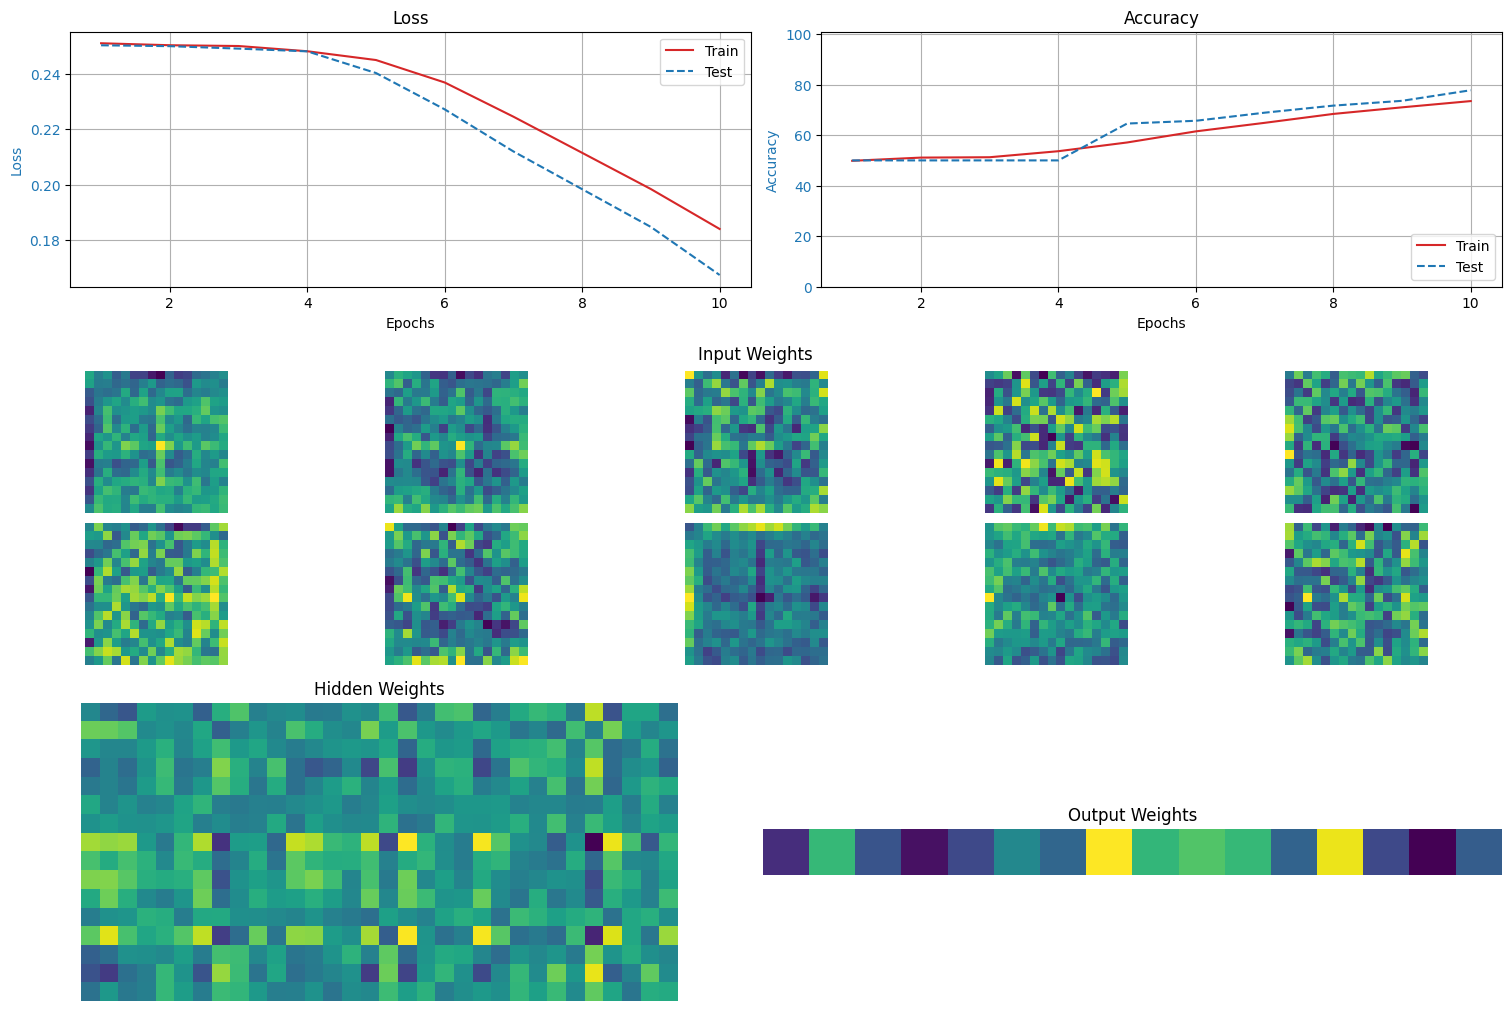

In [13]:
vis_loss_and_weights(loss_train_plot, loss_test_plot, acc_train_plot, acc_test_plot, model)

#### Resulting plot of the PyTorch MLP training

<div style="display:flex; justify-content:center; background-color:white;">
  <div style="text-align:center; padding:10px;">
    <img src="imgs/results_mlp.png" style="height:100%; width:auto;">
  </div>
</div>

### Your Implementation of the Multi Layer Perceptron

In [14]:
from solution_G_X import MultiLayerPerceptron
from utils import plot_results_mlp

Epoch 10 - Loss (Train) 0.36522 - Loss (Test) 0.32600 - Acc (Train) 63.47778 - Acc (Test) 67.40000: 100%|██████████| 10/10 [00:05<00:00,  1.74it/s]


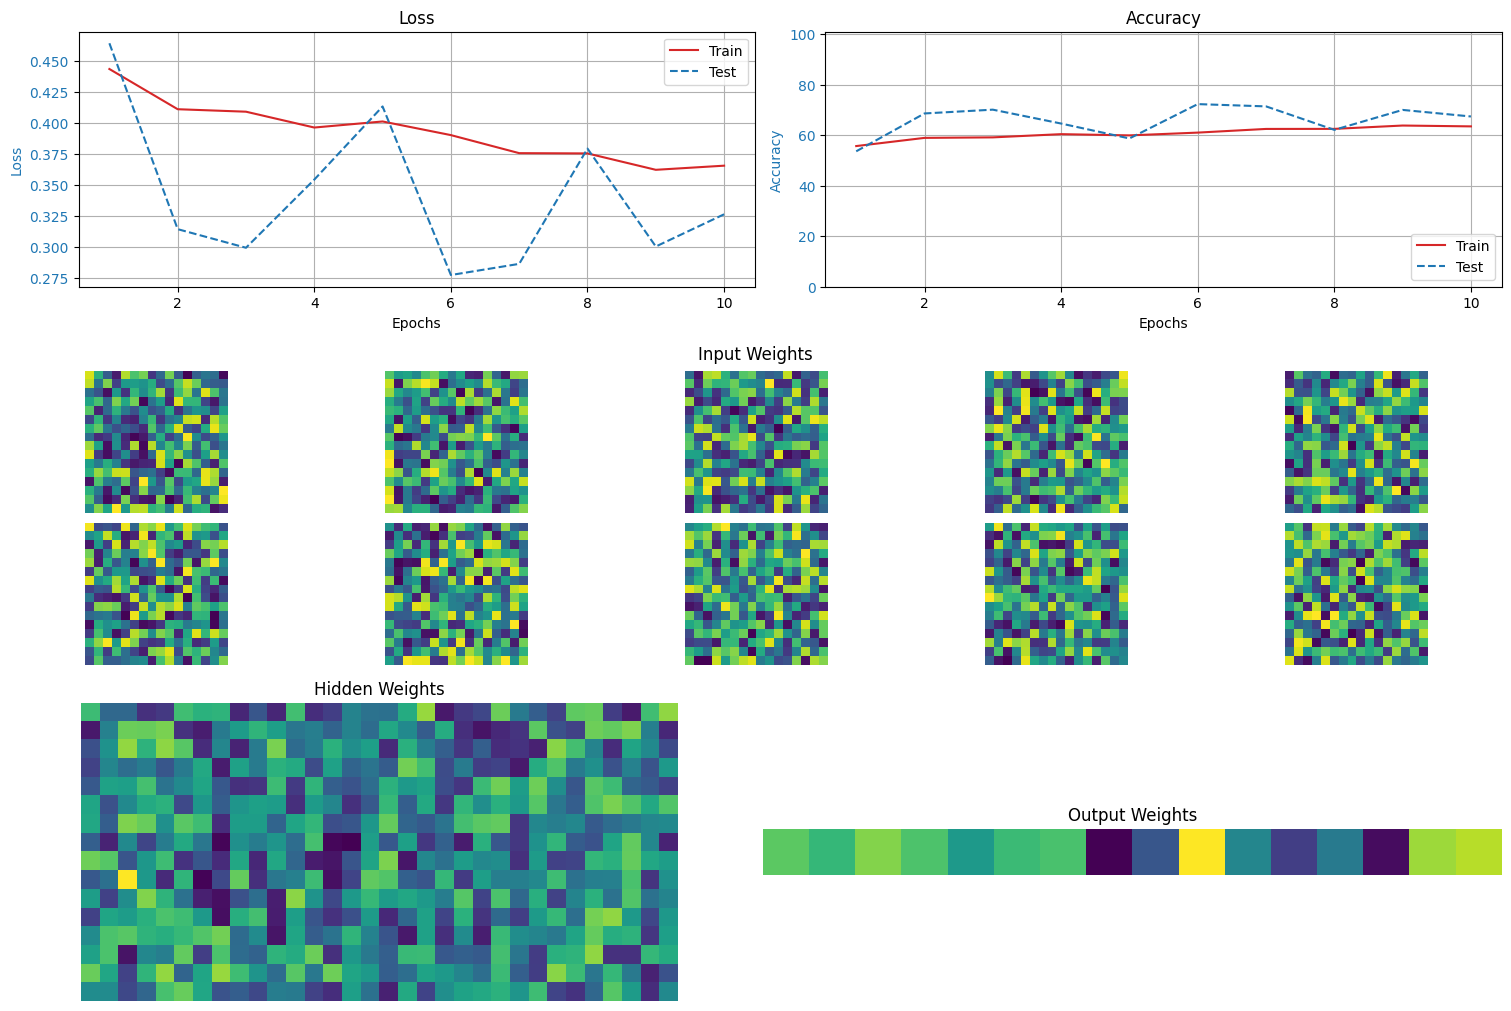

In [15]:
MLP = MultiLayerPerceptron(epochs=EPOCHS_MLP, activation="sigmoid", lr=LR_MLP, weight_init="xavier")

MLP.fit(dataset_train, labels_train, dataset_test, labels_test)

plot_results_mlp(MLP)